In [58]:
"""""Dado el problema de los registros para el equipo de crédito, se infiere se puede automatizar un modelo para obtener un criterio para decidir si prestarle o no a la persona; 
por consiguiente este ejercicio es una aproximación de aprendizaje de máquina supervisado para obtener un juicio. El punto de vista del presente trabajo parte de la siguiente
tesis: Lograr clasificar a las personas mediante un umbral de una tasa de pago de sus créditos. Se considera una buena idea porque hay una evidencia en datos, no obstante,
sería un mejor modelo si hubiera datos referentes a lo que el individuo ha pagado en ese tiempo. Así, no se tendría que inferir con las mismas variables del dataset; 
se podría crear una tasa de pago más precisa sin supuestos. A continuación se presenta la línea de código:"""
#Importación de los datos
import pandas as pd
import os
path=os.getcwd()
file_name='/datos_prestamo.csv'
path_name=path+file_name
df = pd.read_csv(path_name)

In [59]:
#Resumen Cuantitativo de las Variables
df.describe()

,Unnamed: 0,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio
count,557.000000,557.000000,557.000000,536.000000,544.000000,510.000000
mean,278.000000,5478.807899,1685.644596,146.882463,342.220588,0.886275
std,160.936323,6331.507982,2946.151879,86.435191,61.877404,0.317789
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,139.000000,2882.000000,0.000000,100.000000,360.000000,1.000000
50%,278.000000,3812.000000,1302.000000,127.500000,360.000000,1.000000
75%,417.000000,5829.000000,2375.000000,170.000000,360.000000,1.000000
max,556.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [60]:
#Limpieza de la columna Dependientes y una vista rápida de las demás 
df['Dependientes'] = df['Dependientes'].str.strip('+')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            557 non-null    int64  
 1   Fecha_registro        557 non-null    object 
 2   Fecha_contacto        557 non-null    object 
 3   Id                    557 non-null    object 
 4   Genero                545 non-null    object 
 5   Casado                554 non-null    object 
 6   Dependientes          544 non-null    object 
 7   Educacion             557 non-null    object 
 8   Trabaja_para_el       530 non-null    object 
 9   Salario               557 non-null    int64  
 10  Salario_Pareja        557 non-null    float64
 11  Credito_pedido        536 non-null    float64
 12  Plazo_prestamo        544 non-null    float64
 13  Historial_crediticio  510 non-null    float64
 14  Area_vivienda         557 non-null    object 
 15  Estatus_prestamo      5

In [61]:
#Cambio de las fechas
import datetime as dt
df['Fecha_registro'] = pd.to_datetime(df['Fecha_registro'],infer_datetime_format=True).dt.date
df['Fecha_contacto'] = pd.to_datetime(df['Fecha_contacto'],infer_datetime_format=True).dt.date

<AxesSubplot:>

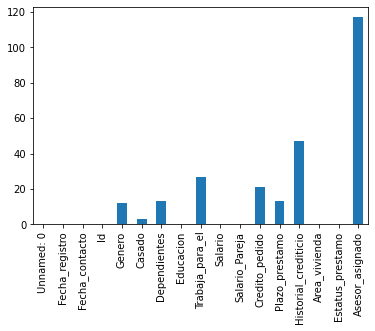

In [62]:
#Resumen de los valores nulos por columna 
df.isna().sum().plot(kind='bar')

In [63]:
#Cambio a categoría de las columnas para un mejor manejo
por_cambiar = ["Casado","Genero","Educacion","Trabaja_para_el","Historial_crediticio","Area_vivienda","Estatus_prestamo"]
df[por_cambiar] = df[por_cambiar].astype('category')


In [64]:
#Conversión a variables dummy para su posterior estudio
df = df.replace(to_replace = "Si", value = 1)
df = df.replace(to_replace = "No", value = 0)


In [65]:
#Cambio de la columna para un mejor estudio
df['Trabaja_para_el'] = df['Trabaja_para_el'].fillna(0)
df['Trabaja_para_el'] = df['Trabaja_para_el'].astype(int)

In [66]:
#Cambio de la columna para poder contabilizarla como dummy y un mejor estudio
import numpy as np
df['Dependientes'] = df['Dependientes'].astype('float')
df['Dependientes'] = df['Dependientes'] >= 1
df['Dependientes'] = df['Dependientes'].replace(np.nan, 0)
df['Dependientes'] = df['Dependientes'].astype(int)


In [67]:
#Cambio de ruta de la columna para su estudio
ruta = {'Graduado':1, 'No Graduado':0}
df['Educacion'] = df['Educacion'].map(ruta) 
df['Educacion'] = df['Educacion'].astype(int)

In [68]:
#Cambio de la columna para un mejor estudio
import  numpy as np
df['Historial_crediticio'] = df['Historial_crediticio'].fillna(0)
df['Historial_crediticio'] = df['Historial_crediticio'].astype(int)

In [69]:
df['Area_vivienda'] = df['Area_vivienda'].astype('category')


In [70]:
#Vista rápida de las columnas y su tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            557 non-null    int64   
 1   Fecha_registro        557 non-null    object  
 2   Fecha_contacto        557 non-null    object  
 3   Id                    557 non-null    object  
 4   Genero                545 non-null    category
 5   Casado                554 non-null    category
 6   Dependientes          557 non-null    int32   
 7   Educacion             557 non-null    int32   
 8   Trabaja_para_el       557 non-null    int32   
 9   Salario               557 non-null    int64   
 10  Salario_Pareja        557 non-null    float64 
 11  Credito_pedido        536 non-null    float64 
 12  Plazo_prestamo        544 non-null    float64 
 13  Historial_crediticio  557 non-null    int32   
 14  Area_vivienda         557 non-null    category
 15  Estatu

In [71]:
#Creación de la tasa de pago, se infiera que las personas pueden destinar una porción de su salario y su pareja menos el monto del credito pedido en el periodo del préstamo

df["y_f"] = (((df["Salario"] * (1/3) + (df["Salario_Pareja"] * (1/4))) / df["Plazo_prestamo"] ) ) - ((df["Credito_pedido"]) / (df["Plazo_prestamo"]))
df.head() 


,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado,y_f
0,0,2019-02-26,2019-02-27,LP002519,Hombre,1,1,1,0,4691,0.0,100.0,360.0,1,Semiurbana,1,Dudley,4.065741
1,1,2019-02-27,2019-02-26,LP001280,Hombre,1,1,0,0,3333,2000.0,99.0,360.0,0,Semiurbana,1,Pablo,4.200000
2,2,2019-02-27,2019-02-28,LP001151,Mujer,0,0,1,0,4000,2275.0,144.0,360.0,1,Semiurbana,1,Dudley,4.883565
3,3,2019-02-28,2019-03-01,LP002036,Hombre,1,0,1,0,2058,2134.0,88.0,360.0,0,Urabana,1,Ana,3.143056
4,4,2019-02-26,2019-02-27,LP002894,Mujer,1,0,1,0,3166,0.0,36.0,360.0,1,Semiurbana,1,Regina,2.831481


In [72]:
#Vista rápida del indicador
df["y_f"].describe()


count    523.000000
mean       7.066236
std       11.353915
min        1.013889
25%        3.436574
50%        4.568056
75%        6.937963
max      178.743056
Name: y_f, dtype: float64

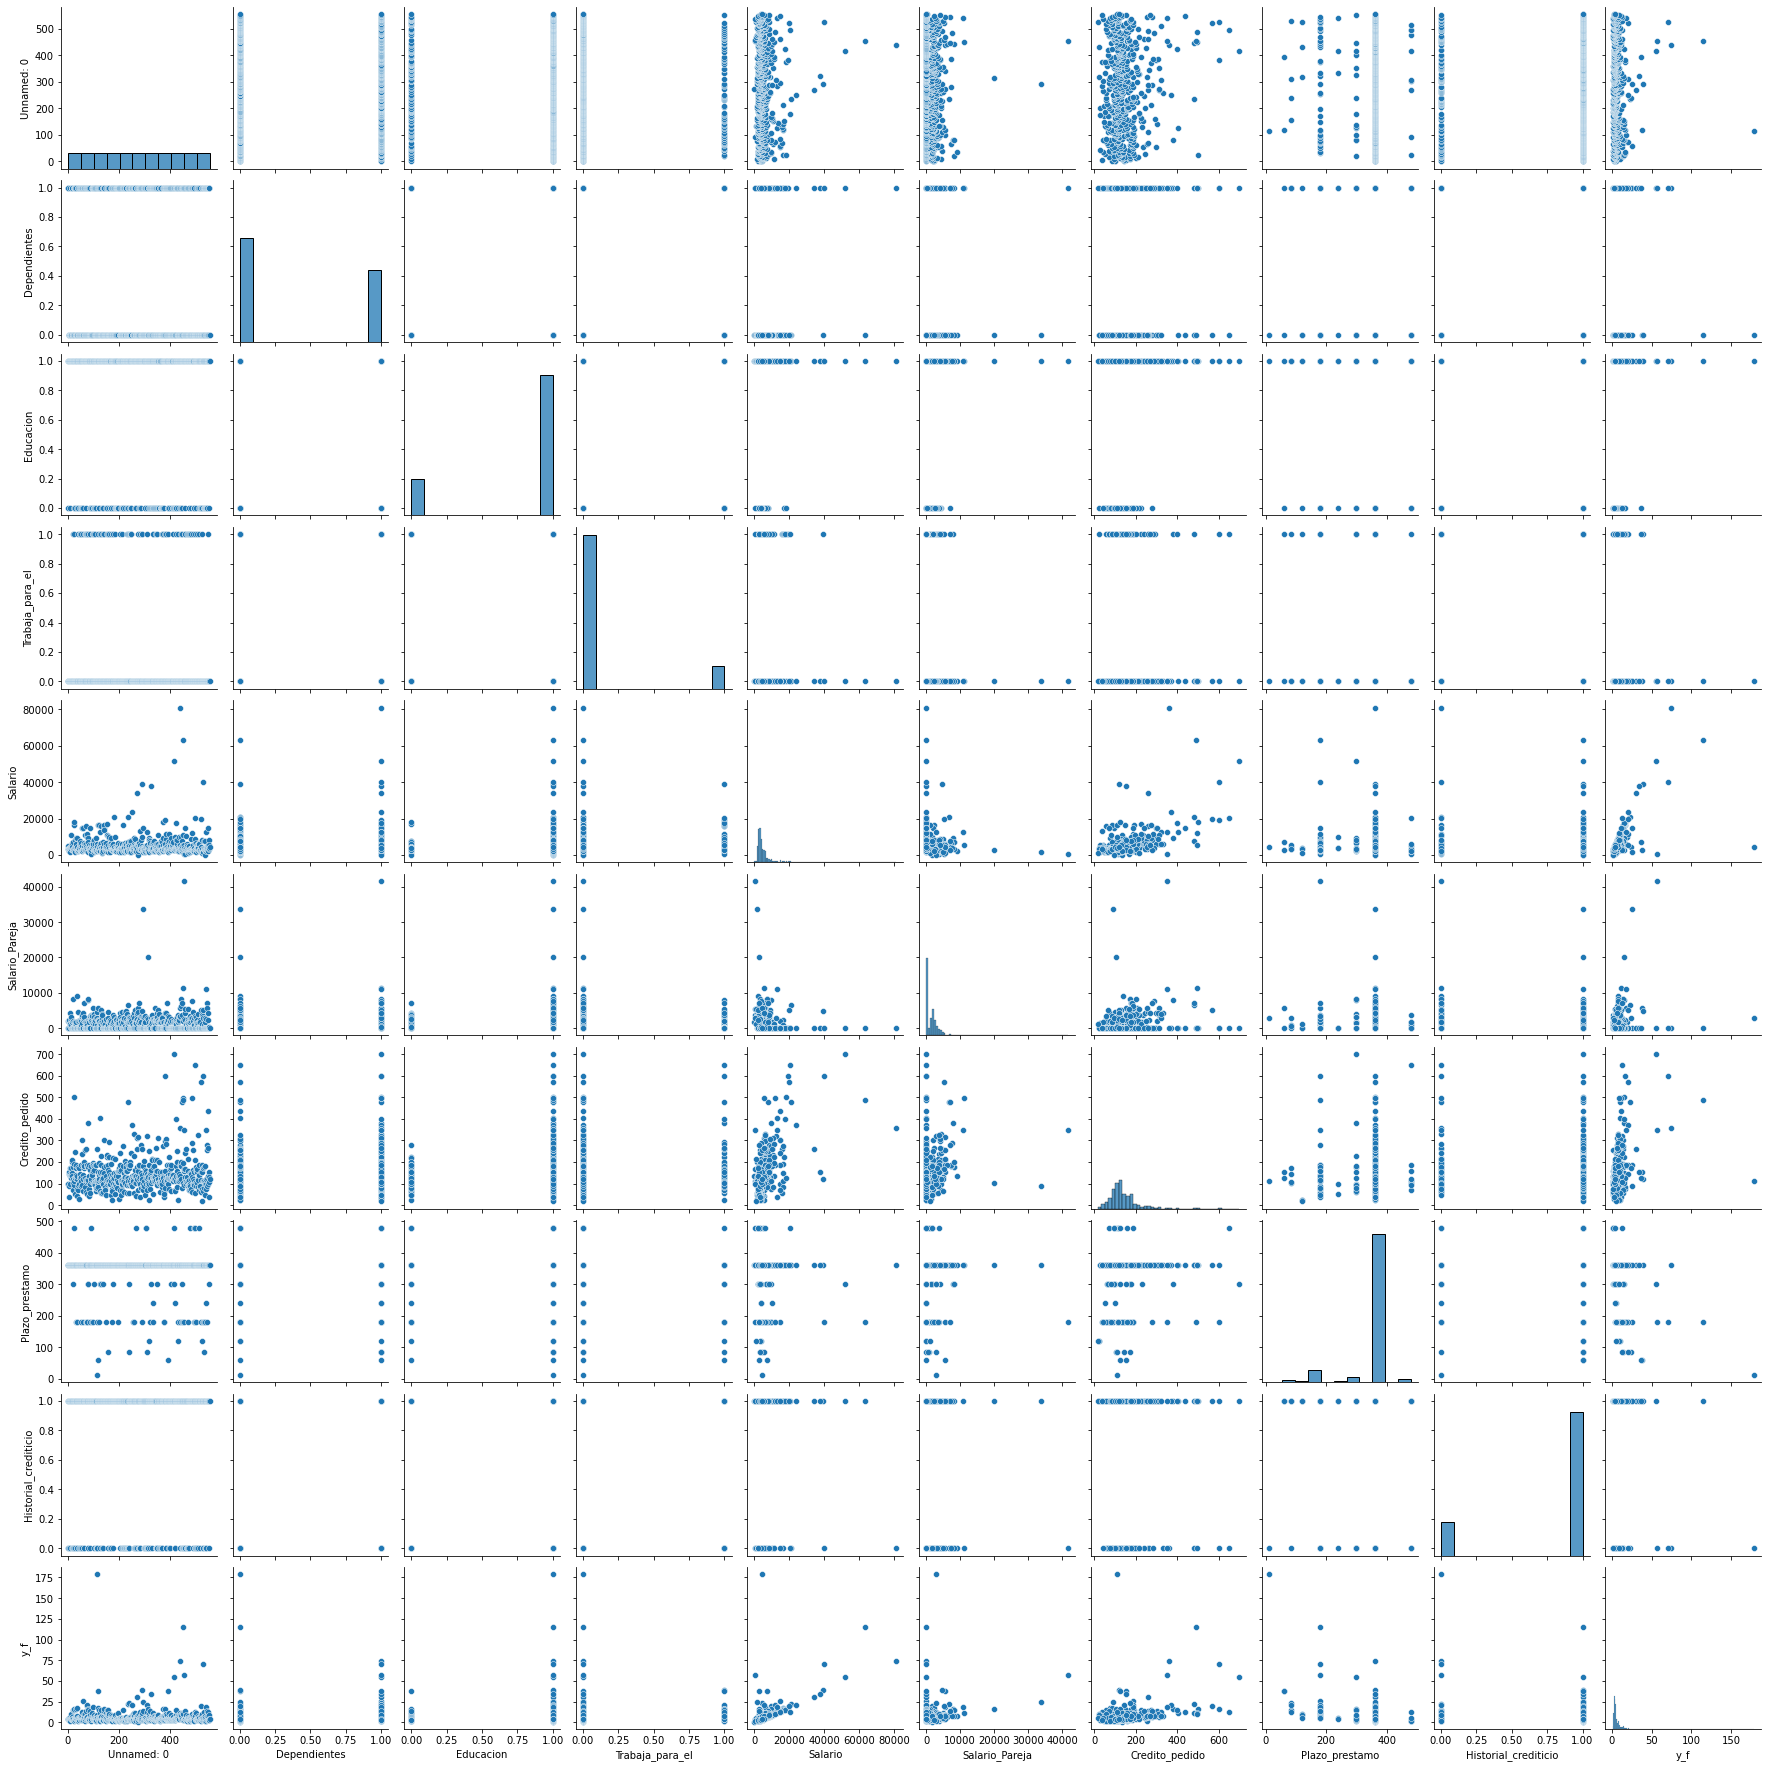

In [73]:
#Análisis  de datos exploratorio de las variables a través de múltiplos pequeños para visualizar distribuciones univariadas de todas las variables en el dataset y 
# sus relaciones por pareja
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

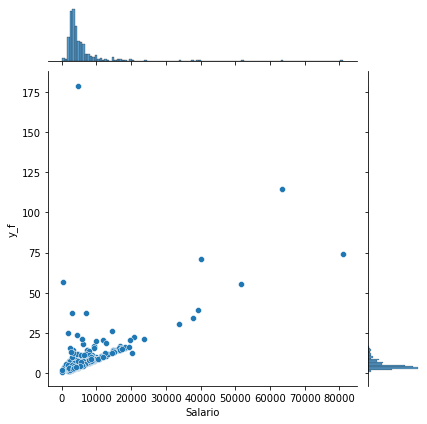

In [74]:
#Relación conjunta de las variables del salario y la tasa
sns.jointplot(data=df, x="Salario", y="y_f")
plt.show()

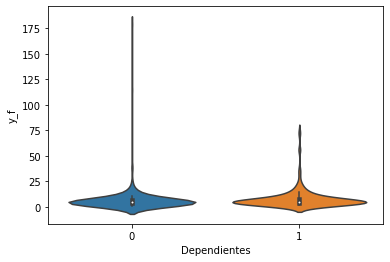

In [75]:
#Exploración de la relación entre variables
_ = sns.violinplot(data=df, y="y_f", x="Dependientes")
plt.show()

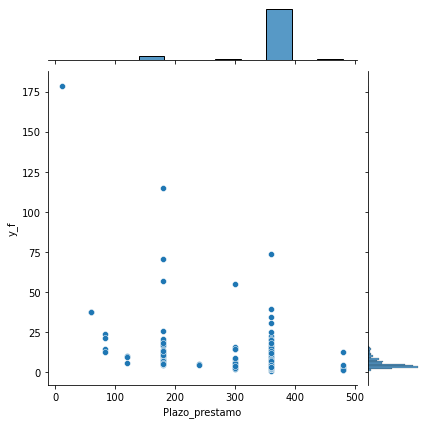

In [76]:
#Exploración de la relación entre variables
sns.jointplot(data=df, x="Plazo_prestamo", y="y_f")
plt.show()

In [77]:
pip install empiricaldist


Note: you may need to restart the kernel to use updated packages.


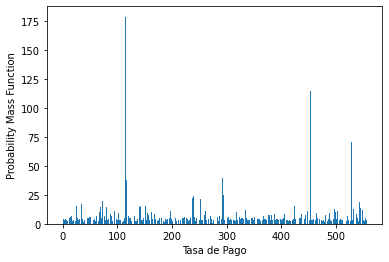

In [78]:
#Visualización de la función de probabilidad (Probability Mass Function) para visualizar todos los datos únicos y sus probabilidades
from empiricaldist import Pmf
tasa_pago = df['y_f']
pmf_tasa_pago = Pmf(tasa_pago)
pmf_tasa_pago.bar(label='tasa_pago')
plt.xlabel('Tasa de Pago')
plt.ylabel('Probability Mass Function')
plt.show()

<AxesSubplot:>

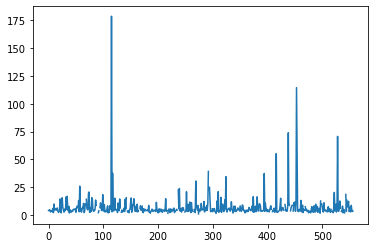

In [79]:
#Visualización de la Función de Masa Acumulada para su comparación con la anterior 
from empiricaldist import Cdf
cdf_tasa_pago = Cdf(tasa_pago)
cdf_tasa_pago.plot()

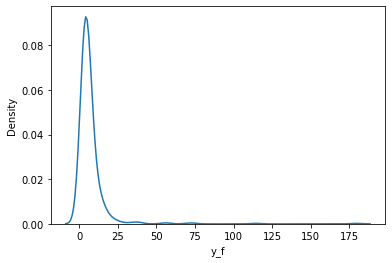

In [80]:
#A través de un estimador de densidad de kernel para visualizar los datos con una curva continua de densidad de probabilidades, así se obtiene una imagen menos desordenada
# y más interpretable 
sns.kdeplot(tasa_pago)
plt.show()

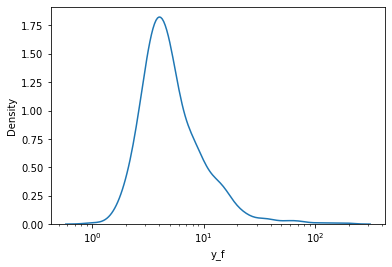

In [81]:
#Al tratarse de ingreso, un logaritmo funciona mejor para su representación 
sns.kdeplot(tasa_pago, log_scale=True)
plt.show()

In [82]:
#Exploración de los cuantiles de los datos de la tasa
print(df['y_f'].quantile(q=[0.1, 0.9]))

0.1     2.666574
0.9    12.114444
Name: y_f, dtype: float64


In [83]:
#Exploración de las correlaciones
print(df.corr())

                      Unnamed: 0  Dependientes  Educacion  Trabaja_para_el  \
Unnamed: 0              1.000000      0.021936  -0.049122        -0.044797   
Dependientes            0.021936      1.000000  -0.066386         0.065001   
Educacion              -0.049122     -0.066386   1.000000         0.007091   
Trabaja_para_el        -0.044797      0.065001   0.007091         1.000000   
Salario                 0.036747      0.103036   0.133697         0.130077   
Salario_Pareja          0.042251     -0.016469   0.060347        -0.052438   
Credito_pedido          0.106058      0.153757   0.156270         0.106127   
Plazo_prestamo         -0.005741     -0.106550   0.065524        -0.018611   
Historial_crediticio   -0.003597     -0.009520   0.085442        -0.008476   
y_f                     0.014696      0.061535   0.090326         0.055709   

                       Salario  Salario_Pareja  Credito_pedido  \
Unnamed: 0            0.036747        0.042251        0.106058   
Dependien

<AxesSubplot:>

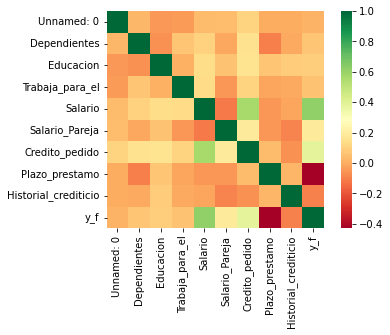

In [84]:
#Representación gráfica de las correlaciones
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [85]:
# Comienza la definición de la variable objetivo (target), se define un umbral de pago a partir del primer cuartil de la distribución. Se infiere que las personas abajo 
# de esa frontera tiene más probabilidades de impago. Además, su definición la hace una variable categórica necesaria para un análisis de clasificación del presente ejercicio.
y = df['y_f'] > df['y_f'].quantile(q=0.25)
y.astype('int')
y.head()


0     True
1     True
2     True
3    False
4    False
Name: y_f, dtype: bool

In [86]:
#Comportamiento de la variable target
y.describe()

count      557
unique       2
top       True
freq       392
Name: y_f, dtype: object

In [87]:
#Definición de los features (x), con las cuales se calibrarán el modelo de aprendizaje de máquina.
col_feat = ["Dependientes","Salario","Salario_Pareja", "Credito_pedido","Educacion","Trabaja_para_el"]
x = df[col_feat] 

In [88]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [110]:
#Se hace una corroboración de la limpieza de los datos antes de su análisis, se crea el imputer para hacer una deducción de los valores faltantes y llenarlos con el promedio
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x)
X = imp.transform(x)

In [113]:
#Creando el setup de una Regresión Logística a través de una pipeline, así se transforma y se estandarizan los datos. Es decir, todos los datos se centran en cero, y se tiene una 
# varianza de 1 para un mejor manejo
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=8)

In [91]:
#Visualización de los parámetros del pipeline
print(pipeline.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('logreg', LogisticRegression())], 'verbose': False, 'scaler': StandardScaler(), 'logreg': LogisticRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'logreg__C': 1.0, 'logreg__class_weight': None, 'logreg__dual': False, 'logreg__fit_intercept': True, 'logreg__intercept_scaling': 1, 'logreg__l1_ratio': None, 'logreg__max_iter': 100, 'logreg__multi_class': 'auto', 'logreg__n_jobs': None, 'logreg__penalty': 'l2', 'logreg__random_state': None, 'logreg__solver': 'lbfgs', 'logreg__tol': 0.0001, 'logreg__verbose': 0, 'logreg__warm_start': False}


In [92]:
#Crear hiperparámetros para el Grid para así hacer tuning de los mejores parámetros de alpha de la regresión logística
c_space = np.logspace(-5, 8, 15)
param_grid = {'logreg__C': c_space}


In [93]:
#Creación de la regresión 
gm_cv = GridSearchCV(pipeline,param_grid=param_grid,cv=3,n_jobs=-1)

In [94]:
#Fit al set de entrenamiento
gm_cv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [95]:
#Predicción sobre el set de prueba
y_pred = gm_cv.predict(X_test)

In [115]:
#Obtención del parámtro de precisión de la regresión
from sklearn.metrics import accuracy_score
acc_scrf = accuracy_score(y_test,y_pred)
print("Puntuación de Precisión {}".format(acc_scrf))

Puntuación de Precisión 0.8357142857142857


In [96]:
#Obtención de los mejores parámetros
best_hyperparms = gm_cv.best_params_ 
print('Mejores hiperparámetros :\n', best_hyperparms)

Mejores hiperparámetros :
 {'logreg__C': 268.2695795279727}


In [97]:
#Obtención del score 
best_score = gm_cv.best_score_
print('Mejor score :\n', best_score)

Mejor score :
 0.8369304556354916


In [98]:
#Creación del reporte de clasificación
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.76      0.74      0.75        47\n        True       0.87      0.88      0.88        93\n\n    accuracy                           0.84       140\n   macro avg       0.82      0.81      0.81       140\nweighted avg       0.83      0.84      0.84       140\n'

In [99]:
#Conformación de la matriz de confusión, para la obtención de los Ciertos positivos, falsos negativos, falsos positivos y falsos negativos.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[35, 12],
       [11, 82]], dtype=int64)

In [100]:
#Obtención de la R2 pertinente a la regresión
r2 = gm_cv.score(X_test, y_test)
print("Tuned Regresión Logística R cuadrada: {}".format(r2))

Tuned Regresión Logística R cuadrada: 0.8357142857142857


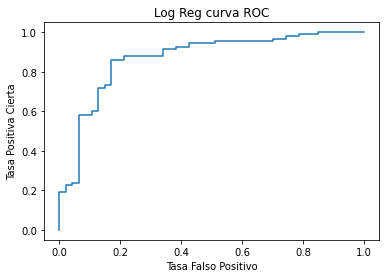

In [101]:
#Creación de la curva Característica Operativa del Receptor, para la obtención de la sensibilidad de todos los posibles puntos del umbral 
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = gm_cv.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel("Tasa Falso Positivo")
plt.ylabel("Tasa Positiva Cierta")
plt.title("Log Reg curva ROC")
plt.show()

In [102]:
#Obtención del área debajo de la curva ROC
roc_score = roc_auc_score(y_test,y_pred_proba)
print("Score ROC {}".format(roc_score))

Score ROC 0.868451155342027


In [103]:
#Aunque se obtiene un buen rendimiento con la regresión, se propone conformar un segundo modelo Random Forest. Se utiliza este modelo por su manejo de las varianzas de los datos
from sklearn.ensemble import RandomForestClassifier
steps2 = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]
pipeline2 = Pipeline(steps2)

In [104]:
#Tuning de los parámetros del modelo y su prueba con el set de entrenamiento del modelo
params_rf = {'rf__n_estimators':[100,200,300], 'rf__max_depth': [4,6,8], 'rf__min_samples_leaf': [0.04,0.06,0.08], 'rf__max_features': ['auto','sqrt']}
grid_rf = GridSearchCV(pipeline2, param_grid=params_rf, cv = 3, scoring='neg_mean_squared_error', verbose = 1, n_jobs = -1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\g6cor\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [4, 6, 8],
                         'rf__max_features': ['auto', 'sqrt'],
                         'rf__min_samples_leaf': [0.04, 0.06, 0.08],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [105]:
#Obtención de los mejores hiperparámetros
best_hyperf = grid_rf.best_params_
print('Mejor hiperparámetros :\n', best_hyperf)

Mejor hiperparámetros :
 {'rf__max_depth': 4, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 0.04, 'rf__n_estimators': 100}


In [106]:
#Obtención del mejor modelo random forest para poder hacer una predicción sobre el test de prueba
best_model = grid_rf.best_estimator_
y_predrf = best_model.predict(X_test)

In [107]:
#Reporte de clasificación 
classification_report(y_test, y_predrf)

'              precision    recall  f1-score   support\n\n       False       0.78      0.62      0.69        47\n        True       0.83      0.91      0.87        93\n\n    accuracy                           0.81       140\n   macro avg       0.80      0.77      0.78       140\nweighted avg       0.81      0.81      0.81       140\n'

In [108]:
#Conformación de la matriz de confusión
confusion_matrix(y_test,y_predrf)

array([[29, 18],
       [ 8, 85]], dtype=int64)

In [114]:
#Obtención de la precisión del modelo Random Forest
from sklearn.metrics import accuracy_score
acc_scrf = accuracy_score(y_test,y_predrf)
print("Puntuación de Precisión {}".format(acc_scrf))

Puntuación de Precisión 0.8142857142857143


In [ ]:
""""Con los resultados obtenidos en el anterior ejercicio se observó el buen rendimiento de la Regresión Logística dado el problema, contó con los mejores resultados
para la predicción a que individuos prestar dinero. Al superar el umbral propuesto, se puede inferir la posibilidad de pago. No obstante, como se menciono al inicio
del ejercicio con más features se podría hacer un mejor ejercicio tales cómo el comportamiento del gasto, datos de pago, entre otros. """